# Task-4: Exploratory Data Analysis - Terrorism (Level-Advanced)


# Author: Rushabh Kumbhani


## Sub-Tasks: 

### 1) As a security/defense analyst, try to find out the hot zone of terrorism. 

### 2) What all security issues and insights you can derive by EDA? 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

# so that we dont have warnings while execution
from warnings import filterwarnings
filterwarnings('ignore')

### Step-1 Read the Dataset and obtain basic information related to the Data

In [2]:
# Read Dataset

df=pd.read_csv(r'C:\Users\DELL\Desktop\TSF Tasks\Exploratory Data Analysis on Global Terrorism/Global Terrorism.csv',error_bad_lines=False)
df.head() #loads the first 5 values of the dataset

# r is used to convert the normal string to raw string

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.shape # returns the dimension of the dataset

(181691, 135)

In [4]:
df.dtypes # returns the type of variables present in each column 

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
df.describe() # describes the statistical data for the columns of type int and float

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.nunique() # displays the unique values in our dataset

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

### Step-2 Check for the Null Values/Duplicate Values in the Dataset and remove them if any and Reduce the number of columns in order to derive meaningful results   

In [8]:
df.isna().sum() # checking if there are any null values in the dataset and getting sum of all the null values present

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

#### Here in approxdate there are many null values so it would be better if we drop that column

In [9]:
df.dropna(axis=1, how="all") # Drops the columns which have all null values 

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [10]:
# Rename the columns for better understanding

df.rename(columns={'eventid':'Eventid', 'iyear':'Year', 'imonth':'Month', 'iday':'Day', 
                          'extended':'Extended', 'resolution':'Resolution',  'attacktype1_txt':'Attacktype', 
                          'country_txt':'Country', 'region_txt':'Region', 'provstate': 'Provstate', 
                          'city':'City', 'crit1':'Crit1', 'crit2':'Crit2', 
                          'crit3':'Crit3', 'multiple':'Multiple', 'success':'Success', 'suicide':'Suicide', 
                          'targtype1_txt':'Targtype', 'natlty1_txt':'Natlty1', 'natlty2_txt':'Natlty2', 
                          'natlty3_txt':'Natlty3', 'gname':'Gname', 'gname2':'Gname2', 'gname3':'Gname3', 
                          'guncertain1':'Guncertain1', 'guncertain2':'Guncertain2', 'guncertain3':'Guncertain3', 
                          'claimed':'Claimed', 'weaptype1_txt':'Weaptype', 'weapsubtype1_txt':'Weapsubtype', 
                          'nkill':'Nkill', 'nkillus':'Nkillus', 'nkillter':'Nkillter', 'nwound':'Nwound', 
                          'nwoundus':'Nwoundus', 'nwoundte':'Nwoundter', 'property':'Property', 
                          'propextent_txt':'Propextent', 'propvalue':'Propvalue', 'ishostkid':'Ishostkid', 
                          'nhostkid':'Nhostkid', 'nhostkidus':'Nhostkidus', 'ransom':'Ransom', 
                          'hostkidoutcome':'Hostkidoutcome', 'nreleased':'Nreleased'},inplace=True)

# Keeping 20 columns in order to derive conclusions better
df1 = df[['Eventid', 'Year','Country', 'Region', 'Provstate', 'City', 'Crit1', 'Crit2', 'Crit3', 
                  'Success', 'Suicide', 'Attacktype', 'Targtype', 'Natlty1','Gname', 'Guncertain1', 
                  'Claimed', 'Weaptype', 'Nkill','Nwound']]

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Eventid      181691 non-null  int64  
 1   Year         181691 non-null  int64  
 2   Country      181691 non-null  object 
 3   Region       181691 non-null  object 
 4   Provstate    181270 non-null  object 
 5   City         181257 non-null  object 
 6   Crit1        181691 non-null  int64  
 7   Crit2        181691 non-null  int64  
 8   Crit3        181691 non-null  int64  
 9   Success      181691 non-null  int64  
 10  Suicide      181691 non-null  int64  
 11  Attacktype   181691 non-null  object 
 12  Targtype     181691 non-null  object 
 13  Natlty1      180132 non-null  object 
 14  Gname        181691 non-null  object 
 15  Guncertain1  181311 non-null  float64
 16  Claimed      115571 non-null  float64
 17  Weaptype     181691 non-null  object 
 18  Nkill        171378 non-

In [12]:
df1.head()

,Eventid,Year,Country,Region,Provstate,City,Crit1,Crit2,Crit3,Success,Suicide,Attacktype,Targtype,Natlty1,Gname,Guncertain1,Claimed,Weaptype,Nkill,Nwound
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,1,1,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,0.0,NaN,Unknown,1.0,0.0
1,197000000002,1970,Mexico,North America,Federal,Mexico city,1,1,1,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,0.0,NaN,Unknown,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,1,0,Assassination,Journalists & Media,United States,Unknown,0.0,NaN,Unknown,1.0,0.0
3,197001000002,1970,Greece,Western Europe,Attica,Athens,1,1,1,1,0,Bombing/Explosion,Government (Diplomatic),United States,Unknown,0.0,NaN,Explosives,NaN,NaN
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,1,1,1,1,0,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,0.0,NaN,Incendiary,NaN,NaN


# Columns Description

1) Eventid - ID of the terrorist event to better uniquely identify the particular terrorist attack

2) Year - Year in which that attack occured

3) Country - Country in which attack occured

4) Region - Region in which attack occured

5) Provstate - Province/state in which attack occured

6) City - City in whicb attack occured

   and similarly all the other column follows

### Step-3 Check for relationship amongst the variables using correlation matrix and visulize it using heatmap to get an idea 

In [13]:
correlation=df1.corr()

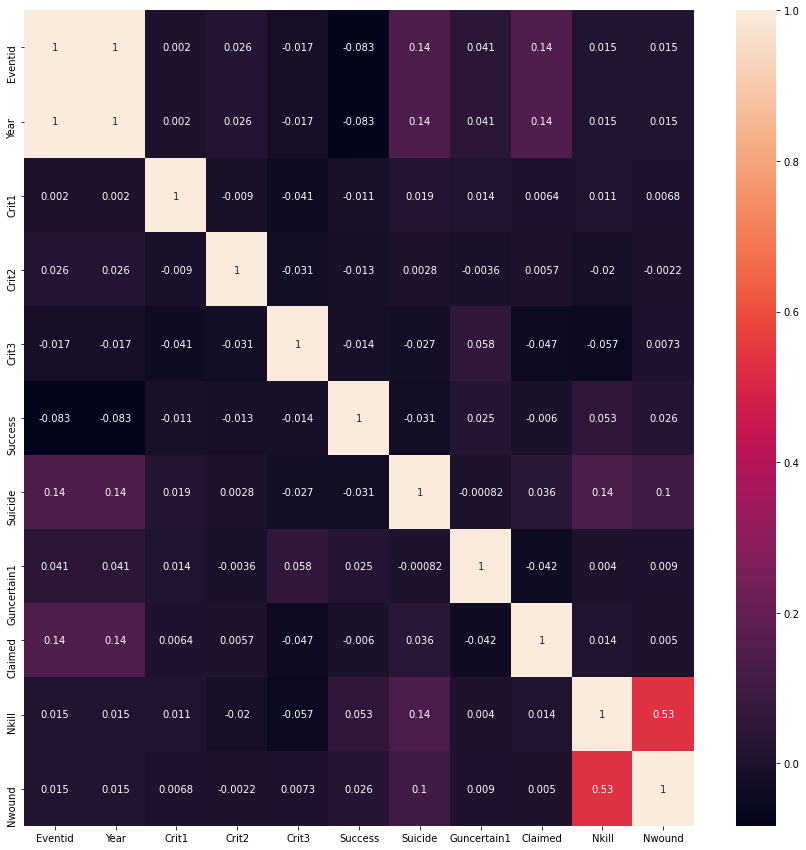

In [14]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

#### Here it seems that correlation between eventid and year is one just because the event id also starts its initial naming from the year 1970, otherwise in no way they can be related. So other columns are not so related and hence we can move on with our analysis

### Step-4 Visualizing frequency of each variables using Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB90C33220>,
      dtype=object)

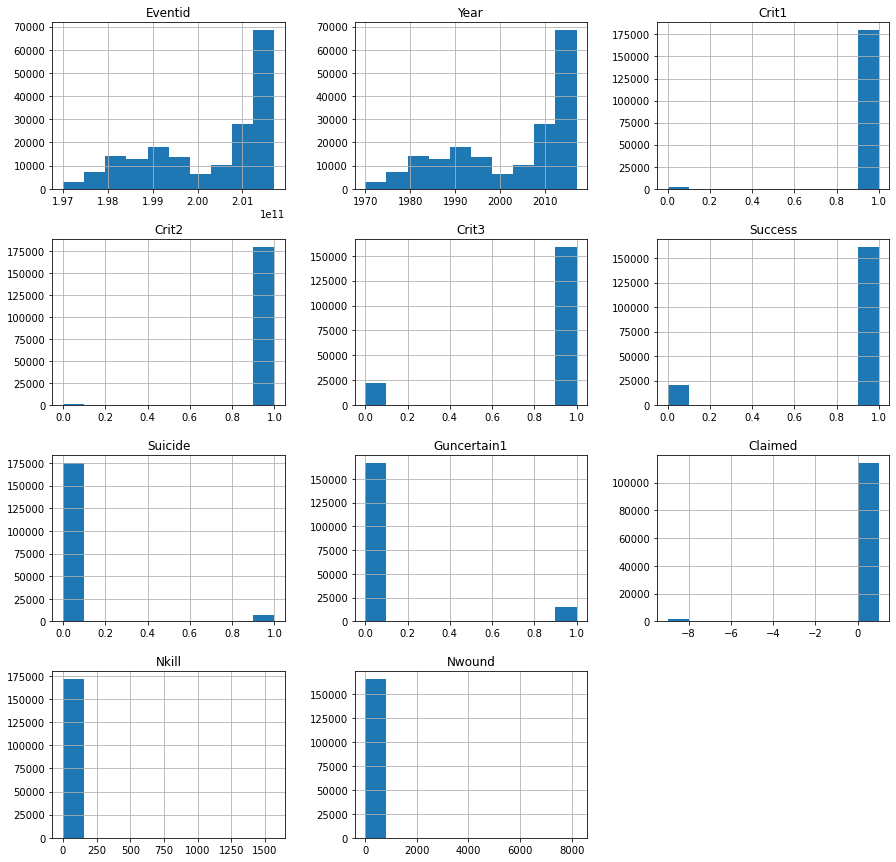

In [15]:
df1.hist(figsize=(15,15))

#### Here we can get idea of the frequency of the variables used in the dataset and in turn operate on those variables accordingly

### 1) Yearwise Analysis of Terrorist activities in order to determine which year was most terror prone and what the trend suggests

Text(0.5, 1.0, 'Number of Terrorist Activities each year')

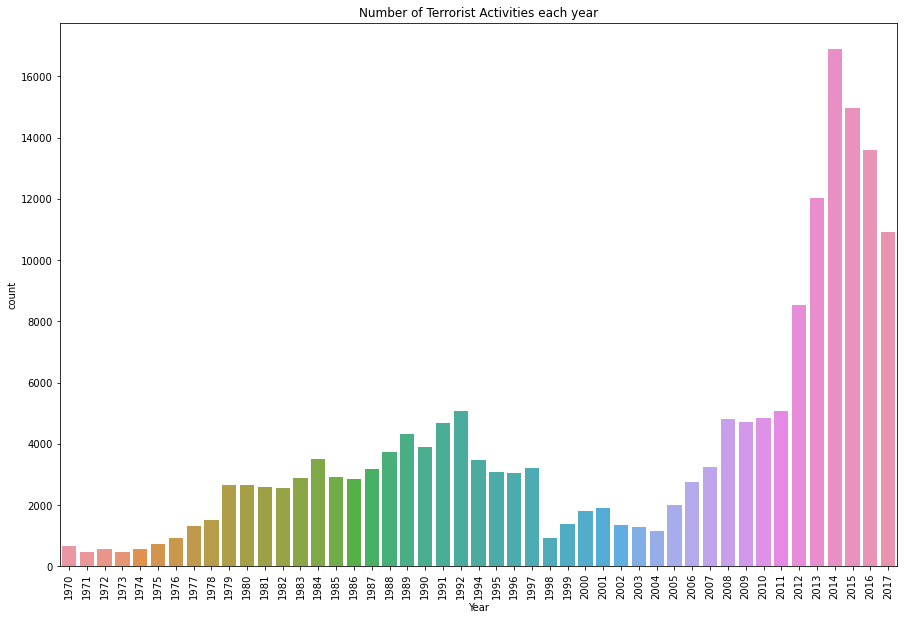

In [16]:
plt.subplots(figsize=(15,10))
sns.countplot('Year', data=df1)
plt.xticks(rotation=90)
plt.title("Number of Terrorist Activities each year")

#### Conclusion: From this we can roughly analyse the trend that over the years number of terrorist activities is growing exponentially

### 2) Analysing the type of attack faced for preventive measures

Text(0.5, 1.0, 'Various methods of attack in order of their frequencies')

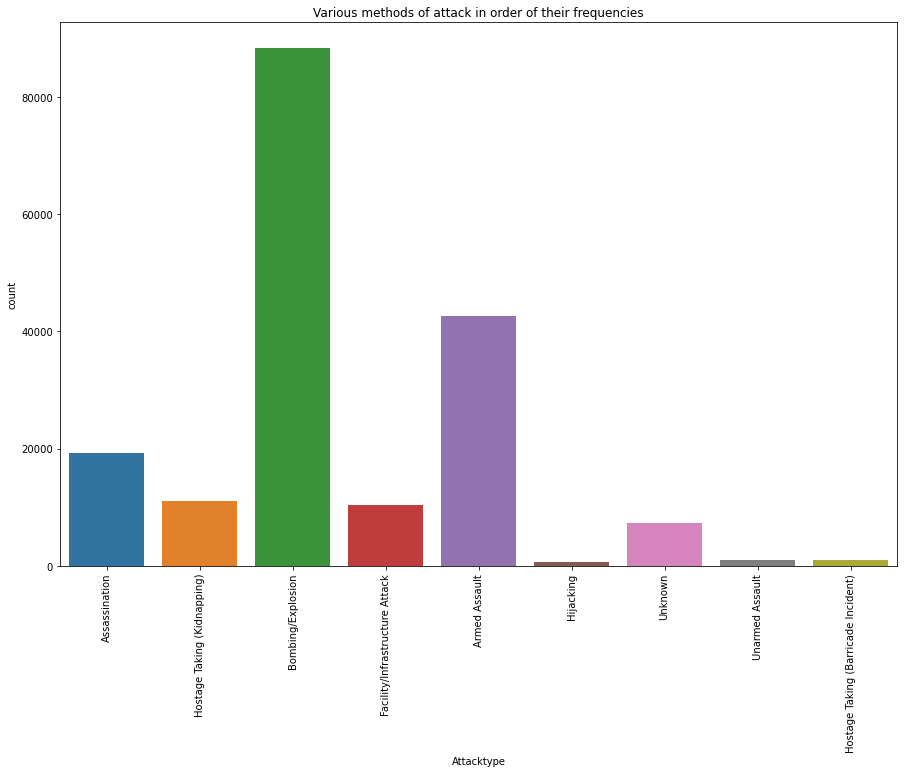

In [17]:
plt.subplots(figsize=(15,10))
sns.countplot('Attacktype', data=df1)
plt.xticks(rotation=90)
plt.title("Various methods of attack in order of their frequencies")

#### Conclusion: From this we can get to know that most attacks carried out by far are of bombing and explosion, so govt. should focus really on preventing those in the future as well

### 3) Analysing the type of target by terrorists for preventive measures

Text(0.5, 1.0, 'Various methods of attack in order of their frequencies')

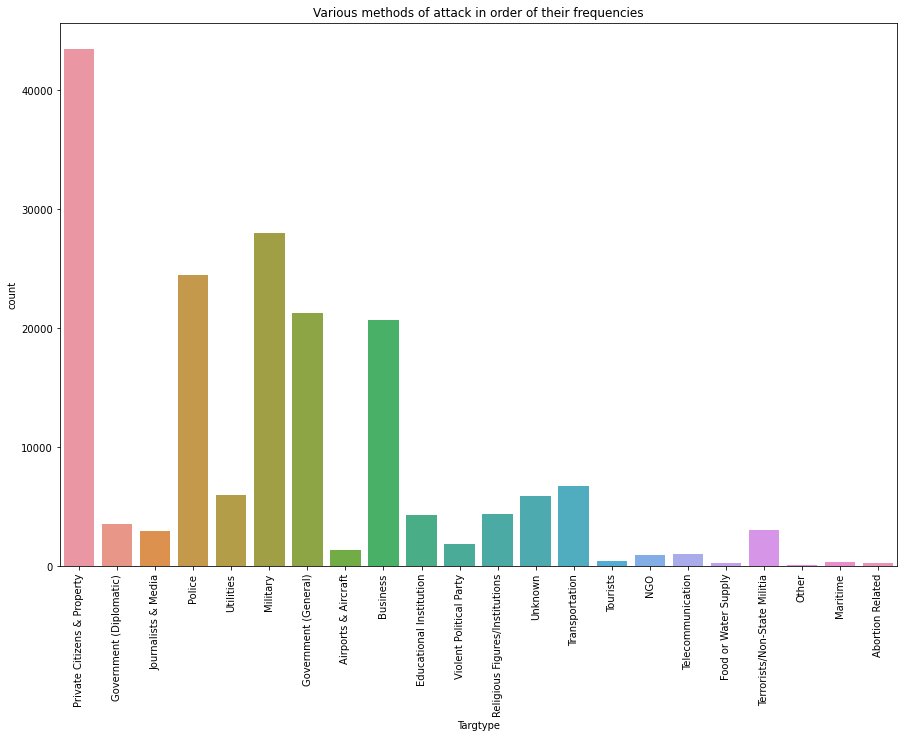

In [18]:
plt.subplots(figsize=(15,10))
sns.countplot('Targtype', data=df1)
plt.xticks(rotation=90)
plt.title("Various methods of attack in order of their frequencies")

#### Conclusion: From this we can get to know that most targets preferred by terrorists were Private Companies and properties where security is comparatively less as compared to Government Properties

### 4) Analysing Type of weapons used for the Attack 

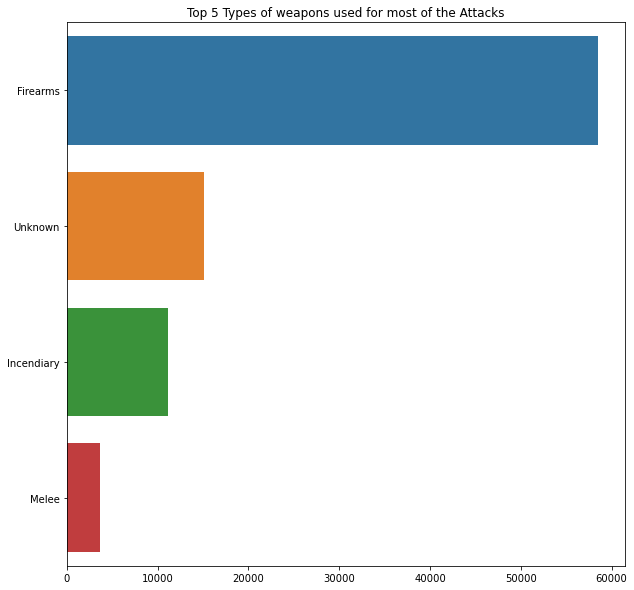

In [19]:
plt.subplots(figsize=(10,10))
sns.barplot(y=df1['Weaptype'].value_counts()[1:5].index, x=df1['Weaptype'].value_counts()[1:5].values)
plt.title("Top 5 Types of weapons used for most of the Attacks")
plt.show()

### 5) Analysing Regions that are affected most by Terrorism

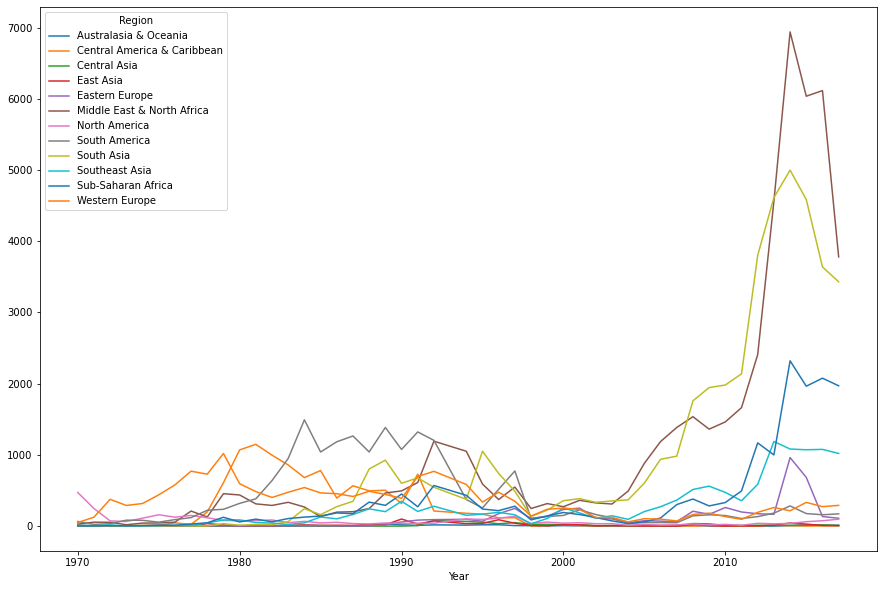

In [27]:
region = pd.crosstab(df1.Year, df1.Region)
region.plot()
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

#### Conclusion: We can Observe that over the years terrorist attacks have seen rise and Countries of Middle East, North Africa and North America have suffered the most

### 6) Analysing the type of Attacks that each Region has faced using Bar Plot

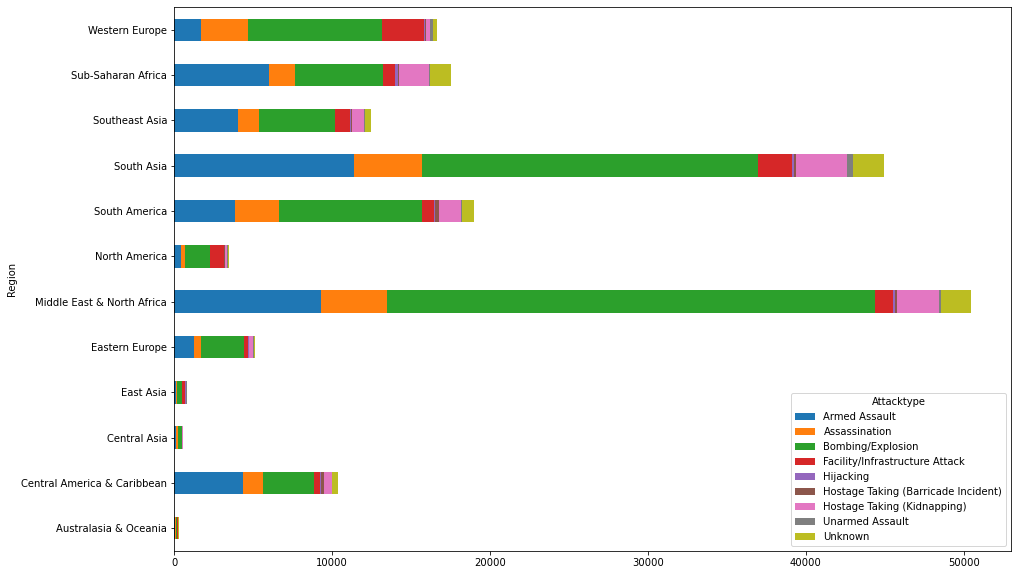

In [34]:
pd.crosstab(df1.Region, df1.Attacktype).plot.barh(stacked=True)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

#### Conclusion: Here we can observe that maximum Bombing/Explosion is carried out in Middle East and North Africa, Armed assault is carried out in South Asia and few similar conclusions can be drawn from it

### 7) Analysing Most Affected Countries by Terrorism

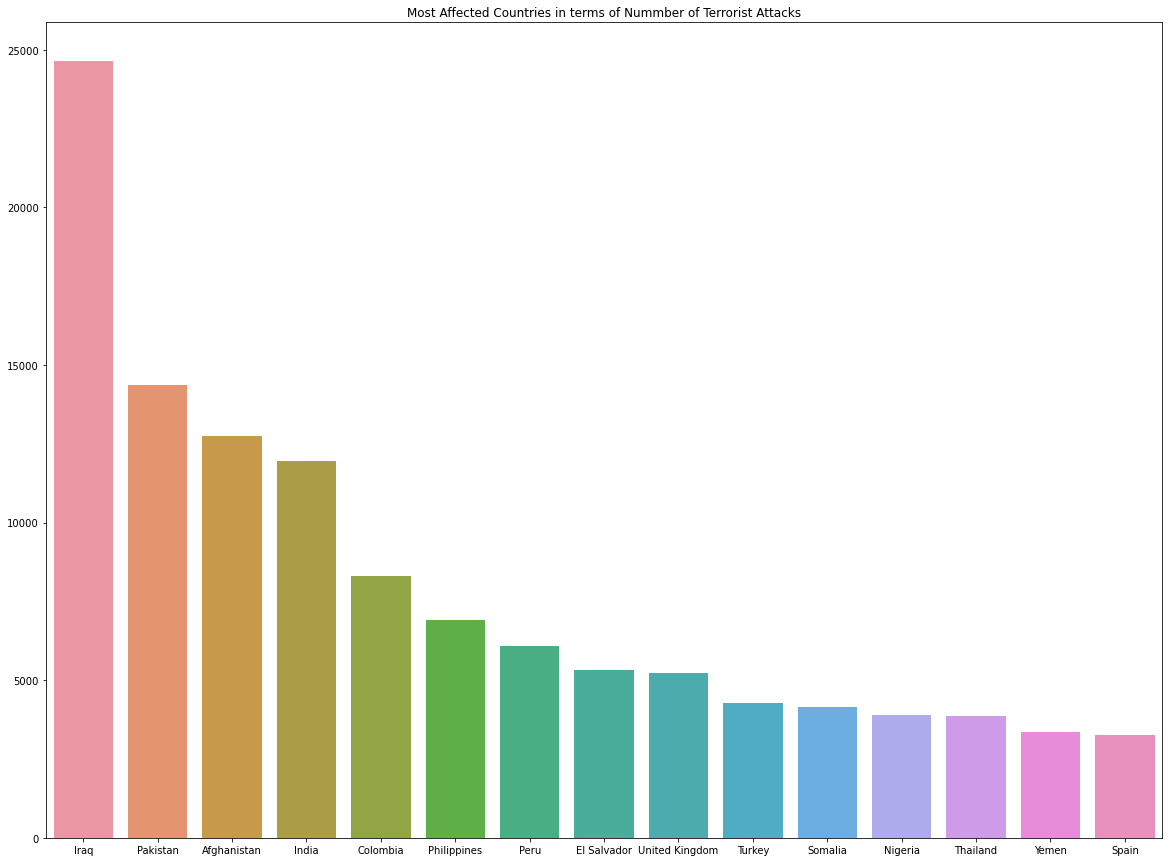

In [40]:
plt.subplots(figsize=(20,15))
sns.barplot(data=df1,x=df1['Country'].value_counts()[:15].index, y=df1['Country'].value_counts()[:15].values)
plt.title("Most Affected Countries in terms of Nummber of Terrorist Attacks")
plt.show()

#### Conclusion: Here we can conlcude that most affected countries by Terrorist attack is Iraq followed by Pakistan, Afghanistan etc.